## DATA UNDERSTANDING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataTrain = pd.read_csv('KDDTrain+.txt')
dataTest = pd.read_csv('KDDTest+.txt')

In [3]:
dataTrain.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
dataTest.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count_no','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','xAttack','level'])

# Assigning name for columns

dataTrain.columns = columns
dataTest.columns = columns
dataTrain = dataTrain.drop('level', axis=1)
dataTest = dataTest.drop('level', axis=1)


In [6]:
data = pd.concat([dataTrain, dataTest], ignore_index=True)

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count_no,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [8]:
data.shape

(148515, 42)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [10]:
# Exploring basic statistics for numerical columns
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count_no,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148515.000000,1.485150e+05,1.485150e+05,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.0,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.00000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000
mean,276.783032,4.022849e+04,1.708908e+04,0.000215,0.020523,0.000202,0.189382,0.004323,0.402794,0.255065,0.001508,0.000976,0.273730,0.012073,0.000525,0.004013,0.0,0.000081,0.012309,83.336128,28.252237,0.256928,0.25534,0.137942,0.138482,0.672985,0.067762,0.097443,183.927792,119.464034,0.534526,0.084104,0.145933,0.030584,0.256125,0.251308,0.136215,0.136392
std,2460.699490,5.409648e+06,3.703550e+06,0.014677,0.240071,0.019417,2.013173,0.072249,0.490462,22.231525,0.038807,0.042389,22.689176,0.517867,0.027701,0.095257,0.0,0.008989,0.110259,116.760724,75.370097,0.431920,0.43258,0.339382,0.341778,0.436543,0.194667,0.258887,98.528779,111.232434,0.448061,0.194103,0.308639,0.108976,0.428501,0.429721,0.322735,0.335277
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,141.000000,17.000000,0.850000,0.91000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Identifying categorical / numerical columns

In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)
print("*******************************************************************************************")
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:")
print(numeric_columns)


Categorical columns:
Index(['protocol_type', 'service', 'flag', 'xAttack'], dtype='object')
*******************************************************************************************
Numeric columns:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count_no', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object

##### Display unique values for numerical values

In [12]:
for column in numeric_columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("--------------------")

Column: duration
Unique values: [   0 5607  507 ... 8216 7477 8209]
--------------------
Column: src_bytes
Unique values: [   146      0    232 ... 176412  11786   5603]
--------------------
Column: dst_bytes
Unique values: [    0  8153   420 ...  9522   214 14839]
--------------------
Column: land
Unique values: [0 1]
--------------------
Column: wrong_fragment
Unique values: [0 3 1]
--------------------
Column: urgent
Unique values: [0 1 3 2]
--------------------
Column: hot
Unique values: [  0   5   6   4   2   1  28  30  22  24  14   3  15  25  19  18  77  17
  11   7  20  12   9  10   8  21  33  44 101]
--------------------
Column: num_failed_logins
Unique values: [0 2 1 3 4 5]
--------------------
Column: logged_in
Unique values: [0 1]
--------------------
Column: num_compromised
Unique values: [   0    3    2    1   19    5    4   38  107  462  110    6  151    7
   31    9  157   13  558   12  371  217   83  193  789  520  884  457
  767  756   21   10  281   23   44  622   18 

Column: dst_host_rerror_rate
Unique values: [0.   1.   0.02 0.56 0.29 0.77 0.08 0.62 0.58 0.46 0.2  0.01 0.37 0.83
 0.74 0.89 0.67 0.61 0.72 0.06 0.15 0.13 0.57 0.64 0.86 0.51 0.92 0.26
 0.04 0.44 0.34 0.43 0.38 0.91 0.99 0.41 0.84 0.03 0.69 0.33 0.27 0.75
 0.42 0.3  0.49 0.05 0.17 0.09 0.94 0.63 0.71 0.85 0.24 0.32 0.8  0.36
 0.88 0.22 0.47 0.07 0.14 0.96 0.87 0.35 0.54 0.9  0.45 0.73 0.95 0.31
 0.39 0.4  0.11 0.5  0.1  0.78 0.12 0.97 0.98 0.19 0.28 0.53 0.79 0.76
 0.59 0.66 0.18 0.82 0.25 0.65 0.21 0.81 0.52 0.6  0.7  0.68 0.55 0.16
 0.23 0.93 0.48]
--------------------
Column: dst_host_srv_rerror_rate
Unique values: [0.   0.01 1.   0.16 0.57 0.61 0.68 0.96 0.88 0.84 0.91 0.12 0.79 0.02
 0.04 0.29 0.03 0.99 0.97 0.07 0.75 0.2  0.44 0.08 0.06 0.81 0.32 0.55
 0.33 0.5  0.05 0.15 0.45 0.66 0.93 0.89 0.62 0.67 0.27 0.41 0.98 0.71
 0.38 0.74 0.19 0.39 0.11 0.92 0.7  0.72 0.73 0.9  0.17 0.53 0.87 0.69
 0.77 0.78 0.52 0.35 0.34 0.13 0.28 0.95 0.47 0.31 0.86 0.65 0.82 0.94
 0.64 0.26 0.14 0.

##### Display unique values for categorical values

In [13]:
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("--------------------")

Column: protocol_type
Unique values: ['udp' 'tcp' 'icmp']
--------------------
Column: service
Unique values: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
--------------------
Column: flag
Unique values: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
--------------------
Column: xAttack
Unique values: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back

In [14]:
# Checking for missing values
print('Is there any missing value present or not?',data.isnull().values.any())

Is there any missing value present or not? False


In [15]:
# Checking for duplicates
print('Is there any duplicated entries in our dataset? ', data.duplicated().any())

Is there any duplicated entries in our dataset?  True


## DATA EXPLORATION

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


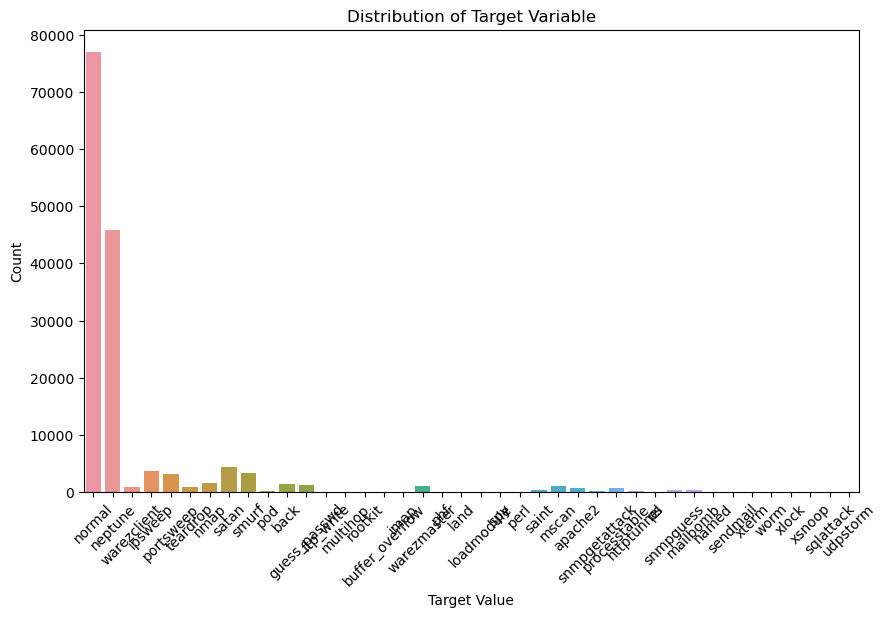

In [16]:
class_counts = data['xAttack'].value_counts()
print(class_counts)
# Visualize the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='xAttack')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

From this distribution, it seems the data is imbalanced, as some classes have considerably higher representation compared to others.

In [17]:
def change_label(data):
    attack_classes = {
        'neptune': 'DoS', 'back': 'DoS', 'land': 'DoS', 'pod': 'DoS', 'smurf': 'DoS',
        'teardrop': 'DoS', 'mailbomb': 'DoS', 'apache2': 'DoS', 'processtable': 'DoS',
        'udpstorm': 'DoS', 'worm': 'DoS',
        'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
        'ps': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R',
        'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L',
        'phf': 'R2L', 'spy': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
        'sendmail': 'R2L', 'named': 'R2L', 'snmpgetattack': 'R2L', 'snmpguess': 'R2L',
        'xlock': 'R2L', 'xsnoop': 'R2L', 'httptunnel': 'R2L',
        'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe',
        'satan': 'Probe', 'mscan': 'Probe', 'saint': 'Probe'
    }
    
    data['xAttack'].replace(attack_classes, inplace=True)
    #dataTest['xAttack'].replace(attack_classes, inplace=True)


In [18]:
change_label(data)
data['xAttack'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [19]:
data['xAttack'].value_counts()

normal    77053
DoS       53386
Probe     14077
R2L        3880
U2R         119
Name: xAttack, dtype: int64

**xAttack target distribution in DataSet :**

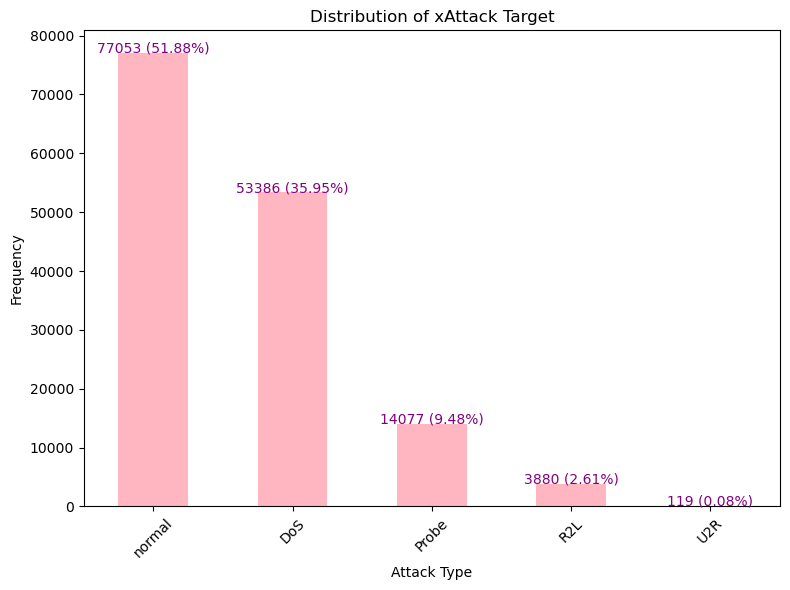

In [20]:
    attack_counts = data['xAttack'].value_counts()
    plt.figure(figsize=(8, 6))
    ax = attack_counts.plot(kind='bar', color='lightpink')
    plt.title('Distribution of xAttack Target')
    plt.xlabel('Attack Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    offset = 20  # Adjust this offset to set the distance between bars and percentages
    
    # Adding percentages on top of each bar
    for i, v in enumerate(attack_counts):
        ax.text(i, v + offset, f"{v} ({(v/len(data))*100:.2f}%)", color='purple', ha='center')
   
    plt.tight_layout()
    plt.show()


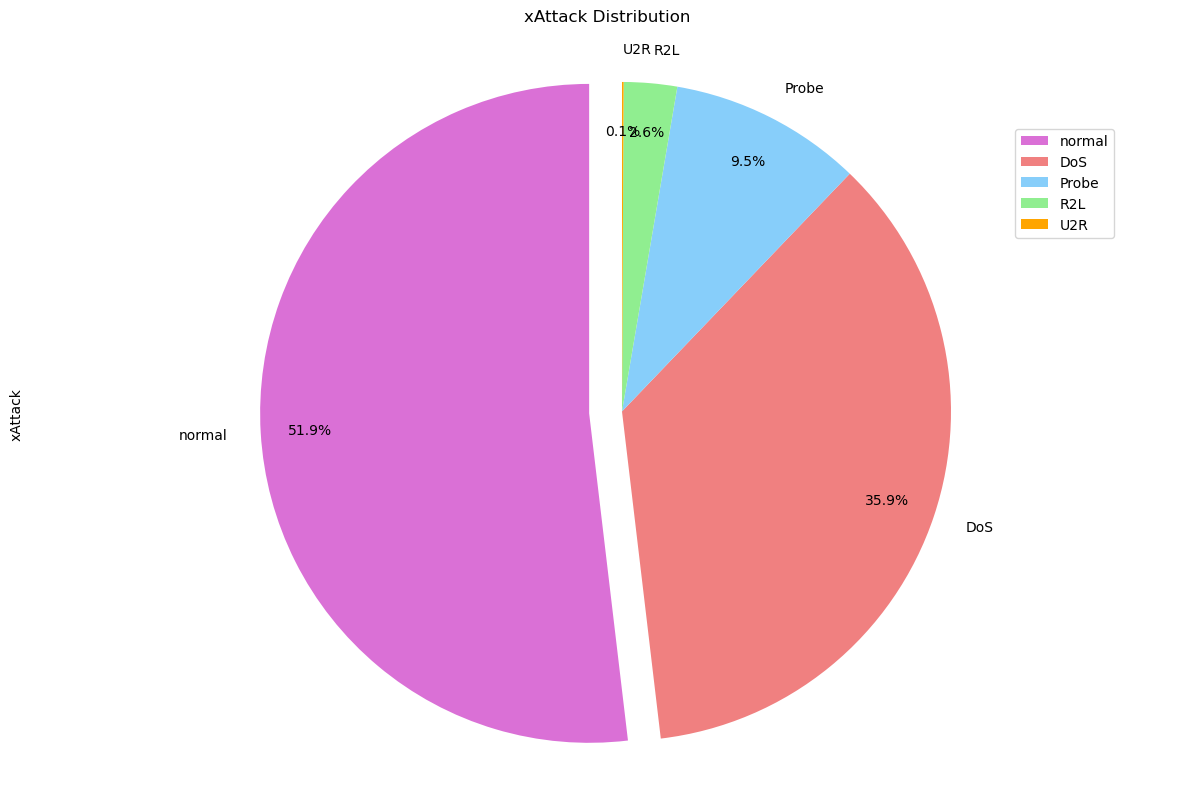

In [21]:

    plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
    
    # Get the counts of each class in the 'xAttack' column
    class_counts = data['xAttack'].value_counts()
    
    # Define colors for the pie chart
    pie_colors = ['orchid', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightpink', 'yellow', 'cyan', 'violet', 'lightgray']
    
    # Plotting a pie chart with adjusted percentage distance
    r = class_counts.plot(
        kind='pie',
        explode=[0.1] + [0] * (len(class_counts) - 1),
        startangle=90,
        autopct='%1.1f%%',
        colors=pie_colors,
        pctdistance=0.85  # Adjust the percentage distance from the center
    )
    
    plt.title('xAttack Distribution', pad=20)  # Increase the padding between the title and plot
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    # Create custom legend with percentages
    plt.legend(class_counts.index, loc='best', bbox_to_anchor=(0.85, 0.9))
    
    # Adjust the distance between plot and title
    plt.subplots_adjust(top=0.85)  # Modify the value to adjust the distance
    
    plt.tight_layout()
    plt.show()


the analysis indicates that the DoS class exhibits the highest number of instances.

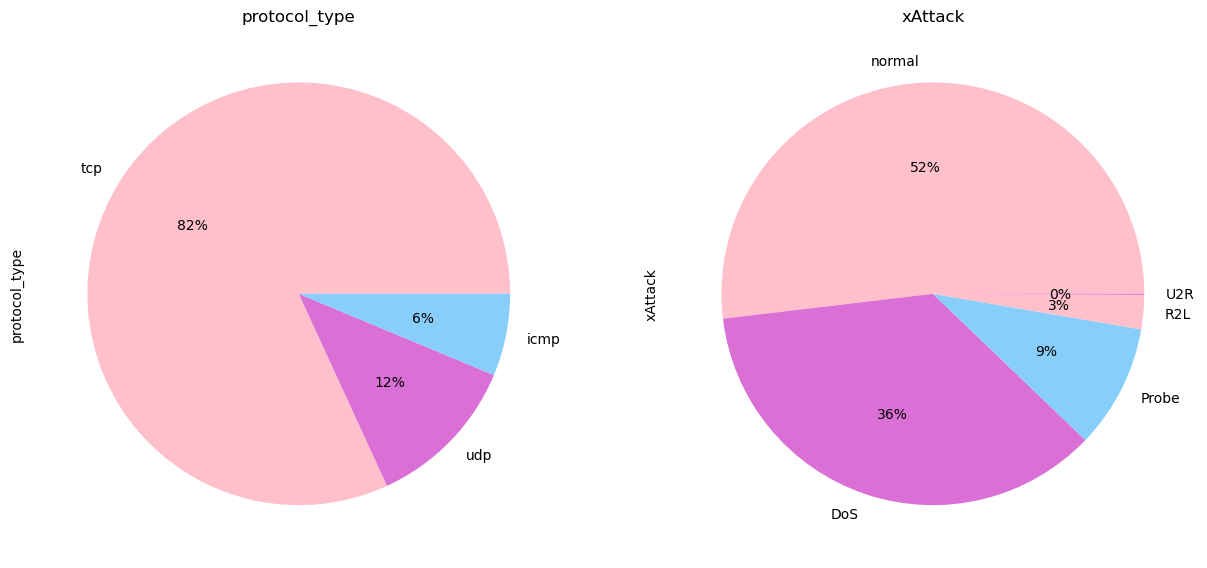

In [22]:
pie_colors = ['pink', 'orchid', 'lightskyblue']

def pie_plot(data, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%', colors=pie_colors)
        ax.set_title(str(col), fontsize = 12)
    plt.show()
pie_plot(data, ['protocol_type', 'xAttack'], 1, 2)


##### Numerical Distrubtion Visualization

In [23]:
'''
column_names = numeric_columns

# Plotting the numerical distribution for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(column_names, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()
'''

"\ncolumn_names = numeric_columns\n\n# Plotting the numerical distribution for each column\nplt.figure(figsize=(12, 8))\n\nfor i, col in enumerate(column_names, 1):\n    plt.subplot(3, 3, i)\n    sns.histplot(data[col], kde=True, color='skyblue')\n    plt.title(f'Distribution of {col}')\n    plt.xlabel('Values')\n    plt.ylabel('Frequency')\n    plt.grid(True)\n\nplt.tight_layout()\nplt.show()\n"

In [24]:
'''
numerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised']
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 7, i)
    sns.histplot(dataT[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()
'''

"\nnumerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised']\nplt.figure(figsize=(16, 10))\n\nfor i, col in enumerate(numerical_columns, 1):\n    plt.subplot(6, 7, i)\n    sns.histplot(dataT[col], kde=True, color='skyblue')\n    plt.title(f'Distribution of {col}')\n    plt.xlabel('Values')\n    plt.ylabel('Frequency')\n    plt.grid(True)\n\nplt.tight_layout()\nplt.show()\n"

In [25]:
'''
', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']
, 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']
'''

"\n', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']\n, 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']\n"

##### Categorical Distribution Visualization

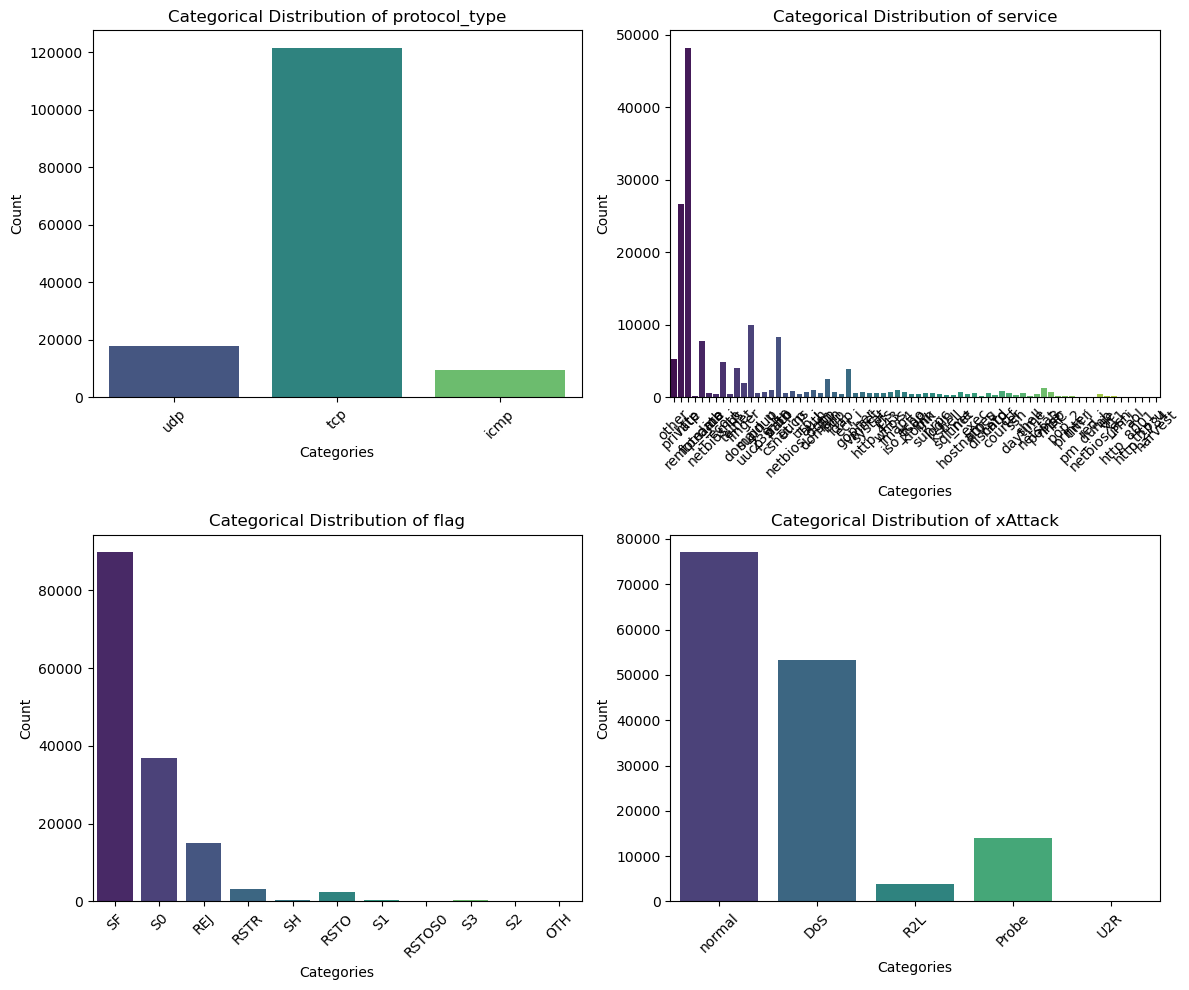

In [26]:
column_names = categorical_columns

plt.figure(figsize=(12, 10))

for i, col in enumerate(column_names):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Categorical Distribution of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Outliers Vizualisation  

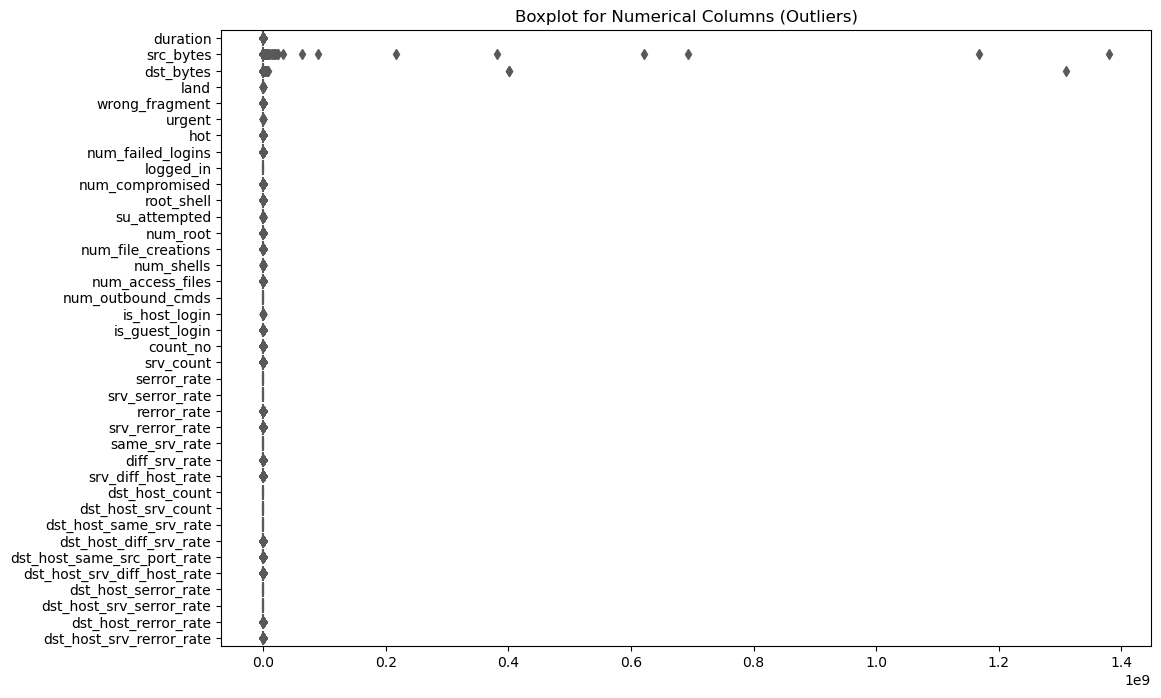

In [27]:
# Selecting numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Creating boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data, orient="h", palette="Set2")
plt.title('Boxplot for Numerical Columns (Outliers)')
plt.show()


We can observe that both src_bytes and dst_bytes contain outliers in dataset 

#### Feature Correlation

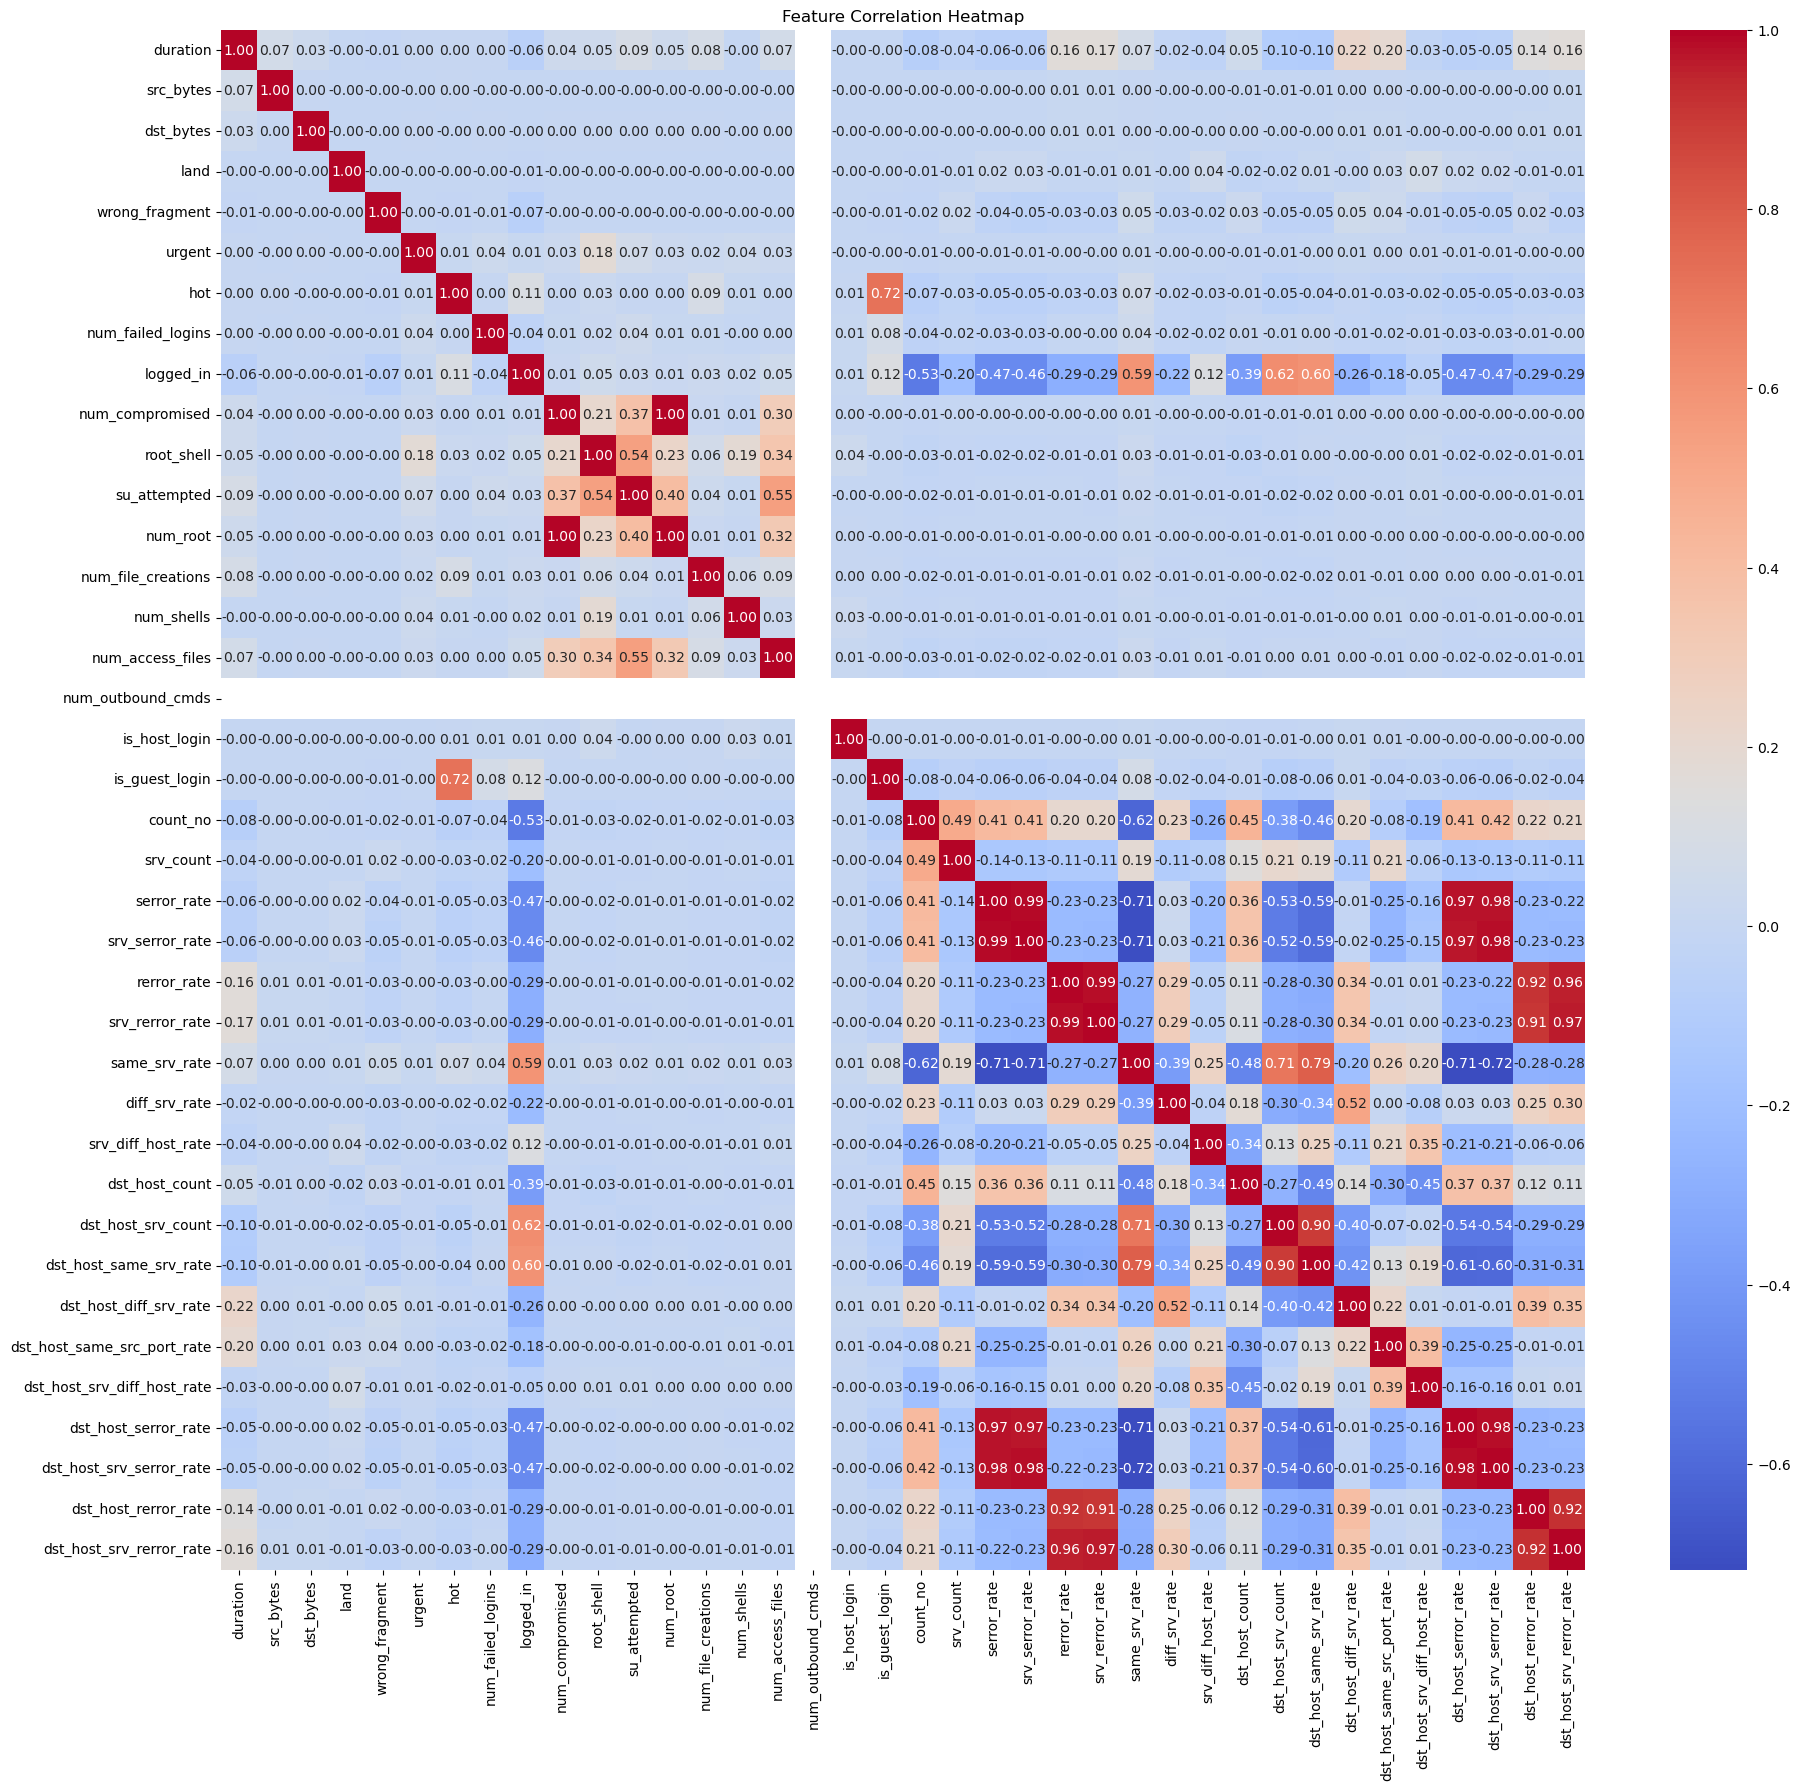

In [28]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Creating a larger heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

The variable num_outbound_cmds doesn't show any correlation with the target level, therefore removing it would enhance the analysis.

In [29]:
correlation_matrix = data.corr().abs()

# Creating a mask to select upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Selecting the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(mask)

# Finding features with high correlation (threshold can be adjusted)
threshold = 0.8
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Highly correlated features:")
print(highly_correlated)


Highly correlated features:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count_no', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


## DATA PREPARATION 

### <font color='orchid'> DATA PRE-PROCESSING :

#### <font color='purple'>1- Handling missing data :

In [30]:
print("Missing values in dataSet:")
data.isnull().sum()

Missing values in dataSet:


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count_no                       0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

=> No missing values in dataset

#### <font color='purple'> 2- Handling Outliers :

To handle Outliers we will use **Interquartile Range (IQR) Method** , it replaces values outside the IQR with the lower and upper bounds.

In [31]:
def count_outliers(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers_count = np.sum(z_scores > threshold)
    return outliers_count

# Count number of outliers for each feature
outliers_count_feature1 = count_outliers(data, 'src_bytes')
outliers_count_feature2 = count_outliers(data, 'dst_bytes')

print(f"Number of outliers in src_bytes: {outliers_count_feature1}")
print(f"Number of outliers in dst_bytes: {outliers_count_feature2}")



Number of outliers in src_bytes: 15
Number of outliers in dst_bytes: 3


In [32]:
def handle_outliers_iqr(data, column):
    column = ['src_bytes', 'dst_bytes']
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

handle_outliers_iqr(data, 'column')


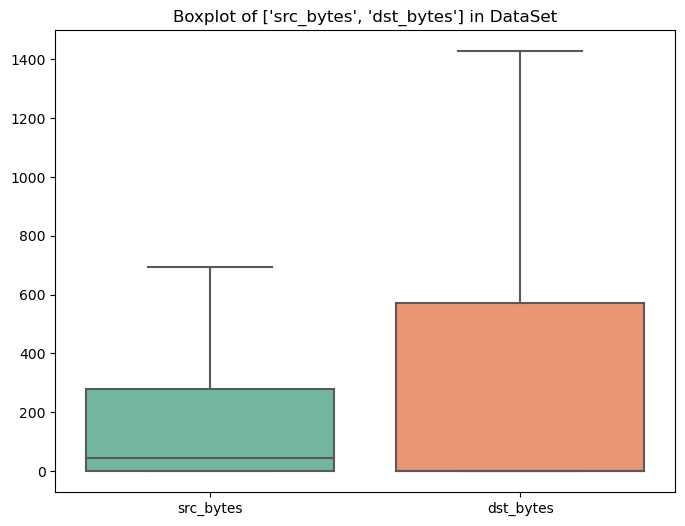

In [33]:
columns = ['src_bytes', 'dst_bytes']

fig, ax = plt.subplots(figsize=(8, 6))

# Plot for DataSet
sns.boxplot(data=data[columns], palette='Set2', ax=ax)
ax.set_title(f'Boxplot of {columns} in DataSet')

plt.show()

#### <font color='purple'> 3- Encoding:

##### Traget Encoding with LabelEncoding :

In [34]:
LE = LabelEncoder()
# Encoding Target in Train dataset
data['xAttack']=LE.fit_transform(data['xAttack'])

In [35]:
data['xAttack'].unique()

array([4, 0, 2, 1, 3])

In [36]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count_no,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,udp,other,SF,146.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,4
1,0,tcp,private,S0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,0,tcp,http,SF,232.0,1427.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,4
3,0,tcp,http,SF,199.0,420.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4
4,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


##### One Hot Encoding:

In [37]:
categorical_columns = ['protocol_type', 'service', 'flag']
attack_types = ['DoS', 'U2R', 'R2L', 'Probe']

# Convert categorical columns to 'category' data type for dataset
for column in categorical_columns:
    data[column] = data[column].astype('category')

# Apply label encoding to convert to numerical values for dataset
for column in categorical_columns:
    data[column] = data[column].cat.codes

# Perform One-Hot Encoding for training dataset
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_columns])
encoded_data = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names(categorical_columns))
data = pd.concat([data, encoded_data], axis=1)

#Dropping Colmuns
data = data.drop(columns=['protocol_type','service','flag'])

# Segment the training dataset based on attack types
attack_types_columns = [col for col in data.columns if any(attack_type in col for attack_type in attack_types)]
attack_types_data = {attack_type: data[data[attack_type_col] == 1] for attack_type, attack_type_col in zip(attack_types, attack_types_columns)}


C:\Users\Nadine\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


This previous code performs the following steps:

1- Converts categorical columns to 'category' data type.

2- Applies label encoding to convert categorical values to numerical.

3- Performs One-Hot Encoding on the categorical columns.

4- Creates a DataFrame with one-hot encoded features.

5- Concatenates the original DataFrame with the encoded DataFrame.

6- Segments the dataset into four parts based on attack types (DoS, U2R, R2L, Probe).

In [38]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count_no,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,protocol_type_0,protocol_type_1,protocol_type_2,service_0,service_1,service_2,service_3,service_4,service_5,service_6,service_7,service_8,service_9,service_10,service_11,service_12,service_13,service_14,service_15,service_16,service_17,service_18,service_19,service_20,service_21,service_22,service_23,service_24,service_25,service_26,service_27,service_28,service_29,service_30,service_31,service_32,service_33,service_34,service_35,service_36,service_37,service_38,service_39,service_40,service_41,service_42,service_43,service_44,service_45,service_46,service_47,service_48,service_49,service_50,service_51,service_52,service_53,service_54,service_55,service_56,service_57,service_58,service_59,service_60,service_61,service_62,service_63,service_64,service_65,service_66,service_67,service_68,service_69,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,146.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232.0,1427.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199.0,420.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data.shape

(148515, 123)

In [40]:
# Checking for duplicates in dataset
print('Is there any duplicated entries in Train dataset? ', data.duplicated().any())
print('number of duplicated entries: ' ,data.duplicated().sum())

Is there any duplicated entries in Train dataset?  True
number of duplicated entries:  1913


In [41]:
#Removing Duplicates in dataset
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates in dataset:", data.shape)

Shape of dataset after removing duplicates in dataset: (146602, 123)


#### <font color='purple'> 4- Data Normalization:

In [42]:
# Split Train dataset into features (X) and the target variable (Y)
X = data.drop(columns=['xAttack'])
Y = data['xAttack']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()

# Fit the scaler on your training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)


### <font color='orchid'> FEATURE SELECTION :

In [43]:
from sklearn.feature_selection import SelectPercentile, f_classif

# Initialize SelectPercentile with ANOVA F-test
selector = SelectPercentile(score_func=f_classif)

# Fit the selector to your data
X_selected = selector.fit_transform(X, Y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Print the indices of the selected features
print("Selected feature indices:", selected_features_indices)

Selected feature indices: [  2   8  19  21  22  25  29  30  34  35  65 116 120]


C:\Users\Nadine\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Nadine\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [44]:
correlation_matrix = data.corr().abs()

# Creating a mask to select upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Selecting the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(mask)

# Finding features with high correlation (threshold can be adjusted)
threshold = 0.8
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Highly correlated features:")
print(highly_correlated)


Highly correlated features:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count_no', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'xAttack', 'protocol_type_0', 'protocol_type_1', 'protocol_type_2', 'service_0', 'service_1', 'service_2', 'service_3', 'service_4', 'service_5', 'service_6', 'service_7', 'service_8', 'service_9', 'service_10', 'service_11', 'service_12', 'service_13', 'service_14', 'service_15', 'service_16', '

In summary, this code performs feature selection using the ANOVA F-test method (f_classif) with the SelectPercentile algorithm, retaining only the top features based on their relationship with the target variable.

In [ ]:
'''
not_selected_indices = [3, 5, 9, 11, 12, 13, 15, 16, 17, 41, 42, 44, 45, 49, 50, 51, 52, 54, 57, 58, 59, 62, 63, 64, 66, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 111, 117, 118, 119]
# Remove columns from scaledData based on not_selected_indices
scaledDataTrain_selected = np.delete(dataTrainScaled, not_selected_indices, axis=1)

# Now scaledDataTrain_selected and scaledDataTest_selected contain only the selected features after dropping the specified columns
'''

## MODELING

### <font color='orchid'> DECISION TREE :

In [ ]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini')

# Train the model
decision_tree.fit(X_train, Y_train)

# Make predictions on the test set
decision_tree_predictions = decision_tree.predict(X_test)

In [ ]:
# Generate "importance features" numerically and graphically
feature_importance = decision_tree.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [ ]:
# Display the decision tree graphically
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

In [ ]:
# Display the tree in the form of rules
from sklearn.tree import export_text
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print(tree_rules)

###  <font color='orchid'> KNN :

to find the optimal number of neighbors we will use cross-validation with Grid Search:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for n_neighbors values to try
param_grid = {'n_neighbors': range(1, 61)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best value of n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameter(s)
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best n_neighbors:", best_n_neighbors)


=> We can conclude that n_neighbors = 

In [ ]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,61))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
# #Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
# #Create new KNN object
knn_2 = KNeighborsClassifier()
# #Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# #cv: number of folds of the cross validation

# #Fit the model
best_model = clf.fit(X_train, Y_train)
# #Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# Initialize the KNN Classifier with a value for k (neighbors)
knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')  
# Train the model
knn.fit(Xtrain, Y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

### <font color='orchid'>SVM :

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, Y_train)
    svm_models[kernel] = svm_model

### <font color='orchid'>LOGISTIC REGRESSION :

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, Y_train)
log_reg_predictions = log_reg_model.predict(X_test)

###  <font color='orchid'> ENSEMBLE LEARNING MODELS  (RANDOM FOREST) :

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)

## EVALUATION  

#### quantitative metrics (Accuracy, precision, recall, F1-measure, ROC, AUC, etc).

### <font color='orchid'> DECISION TREE :

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, decision_tree_predictions)
# Print the evaluation metrics
print(f"\033[1mAccuracy:\033[0m {accuracy}")
print("\033[1mClassification Report:\033[0m")
print(classification_report(Y_test, decision_tree_predictions))


# Confusion Matrix plot
conf_matrix = confusion_matrix(Y_test, decision_tree_predictions)
conf_df = pd.DataFrame(conf_matrix, index = decision_tree.classes_, columns = decision_tree.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for each class separately
roc_auc_scores = []
for class_value in np.unique(Y_test):
    y_true = (Y_test == class_value)
    y_pred = (predictions == class_value)
    roc_auc_class = roc_auc_score(y_true, y_pred)
    roc_auc_scores.append(roc_auc_class)

# Plotting ROC AUC for each class
plt.figure(figsize=(8, 6))
plt.bar(np.unique(Y_test), roc_auc_scores, color='purple')
plt.xlabel('Class')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Class')
plt.show()


###  <font color='orchid'> KNN :

In [ ]:
# We Calculate evaluation metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix plot
conf_matrix = confusion_matrix(Y_test, predictions)
conf_df = pd.DataFrame(conf_matrix, index = knn.classes_, columns = knn.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



### <font color='orchid'>SVM :

In [ ]:
svm_report = classification_report(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_accuracy = accuracy_score(Ytest, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(svm_report)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

# Confusion Matrix plot
conf_matrix = confusion_matrix(Ytest, predictions)
conf_df = pd.DataFrame(conf_matrix, index = svm_model.classes_, columns = svm_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for each class separately
roc_auc_scores = []
for class_value in np.unique(Ytest):
    y_true = (Ytest == class_value)
    y_pred = (predictions == class_value)
    roc_auc_class = roc_auc_score(y_true, y_pred)
    roc_auc_scores.append(roc_auc_class)

# Plotting ROC AUC for each class
plt.figure(figsize=(8, 6))
plt.bar(np.unique(Ytest), roc_auc_scores, color='purple')
plt.xlabel('Class')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Class')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

evaluation_results = {}

for kernel, svm_model in svm_models.items():
    predictions = svm_model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions, average='weighted')
    recall = recall_score(Y_test, predictions, average='weighted')
    f1 = f1_score(Y_test, predictions, average='weighted')
    
    evaluation_results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Display evaluation results
for kernel, metrics in evaluation_results.items():
    print(f"Evaluation metrics for SVM model with {kernel} kernel:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


### <font color='orchid'>LOGISTIC REGRESSION :

In [ ]:
log_reg_report = classification_report(Y_test, log_reg_predictions)
log_reg_conf_matrix = confusion_matrix(Y_test, log_reg_predictions)
log_reg_accuracy = accuracy_score(Y_test, log_reg_predictions)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("\nLogistic Regression Classification Report:")
print(log_reg_report)
print("Logistic Regression Confusion Matrix:")
print(log_reg_conf_matrix)

# Confusion Matrix plot
conf_matrix = confusion_matrix(Y_test, log_reg_predictions)
conf_df = pd.DataFrame(conf_matrix, index = log_reg_model.classes_, columns = log_reg_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for each class separately
roc_auc_scores = []
for class_value in np.unique(Y_test):
    y_true = (Ytest == class_value)
    y_pred = (predictions == class_value)
    roc_auc_class = roc_auc_score(y_true, y_pred)
    roc_auc_scores.append(roc_auc_class)

# Plotting ROC AUC for each class
plt.figure(figsize=(8, 6))
plt.bar(np.unique(Y_test), roc_auc_scores, color='purple')
plt.xlabel('Class')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Class')
plt.show()


###  <font color='orchid'> ENSEMBLE LEARNING MODELS (RANDOM FOREST) :

In [ ]:
rf_report = classification_report(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)
rf_accuracy = accuracy_score(Y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(rf_report)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Confusion Matrix plot
conf_matrix = confusion_matrix(Y_test, rf_predictions)
conf_df = pd.DataFrame(conf_matrix, index = rf_model.classes_, columns = rf_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for each class separately
roc_auc_scores = []
for class_value in np.unique(Y_test):
    y_true = (Ytest == class_value)
    y_pred = (predictions == class_value)
    roc_auc_class = roc_auc_score(y_true, y_pred)
    roc_auc_scores.append(roc_auc_class)

# Plotting ROC AUC for each class
plt.figure(figsize=(8, 6))
plt.bar(np.unique(Y_test), roc_auc_scores, color='purple')
plt.xlabel('Class')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Class')
plt.show()


#### ROC

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve for each model
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_predictions)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


## DEPLOYMENT 